###### Basic Errorbars

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn-whitegrid')

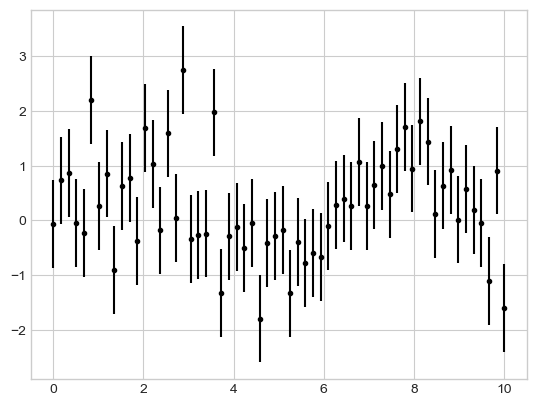

In [2]:
x=np.linspace(0,10,60)
dy=0.8
y=np.sin(x)+dy*np.random.randn(60)

plt.errorbar(x,y,yerr=dy,fmt='.k');

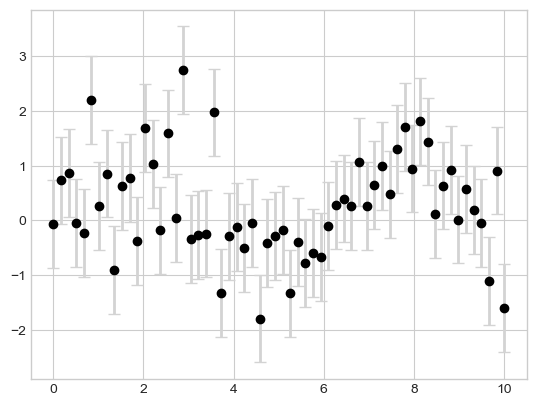

In [7]:
plt.errorbar(x,y,yerr=dy,fmt='o',color='black',
            ecolor='lightgray',elinewidth=2,capsize=4);

##### Continuos Errors

In [14]:
from sklearn.gaussian_process import GaussianProcessRegressor


#define model amd draw some data
model=lambda x:x*np.sin(x)
xdata=np.array([1,3,5,6,8])
ydata=model(xdata)

#compute the Gaussian process fit
gp=GaussianProcessRegressor()
gp.fit(xdata[:,np.newaxis],ydata)

xfit=np.linspace(0,10,1000)
yfit,MSE=gp.predict(xfit[:,np.newaxis],return_std=True)
dyfit=2*np.sqrt(MSE) #2*sigma ~ 95% confidence region

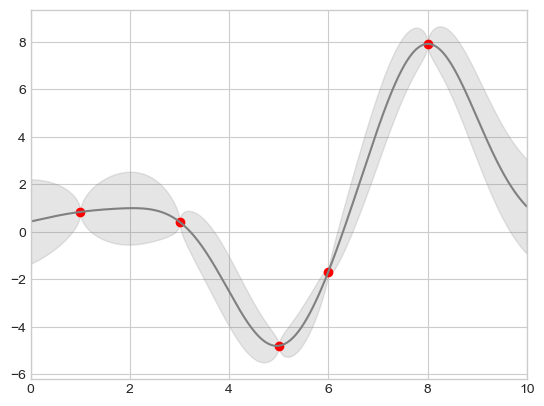

In [15]:
plt.plot(xdata,ydata,'or')
plt.plot(xfit,yfit,'-',color='gray')

plt.fill_between(xfit,yfit-dyfit,yfit+dyfit, color='gray',
                alpha=0.2)
plt.xlim(0,10);